# Schwinger Effect

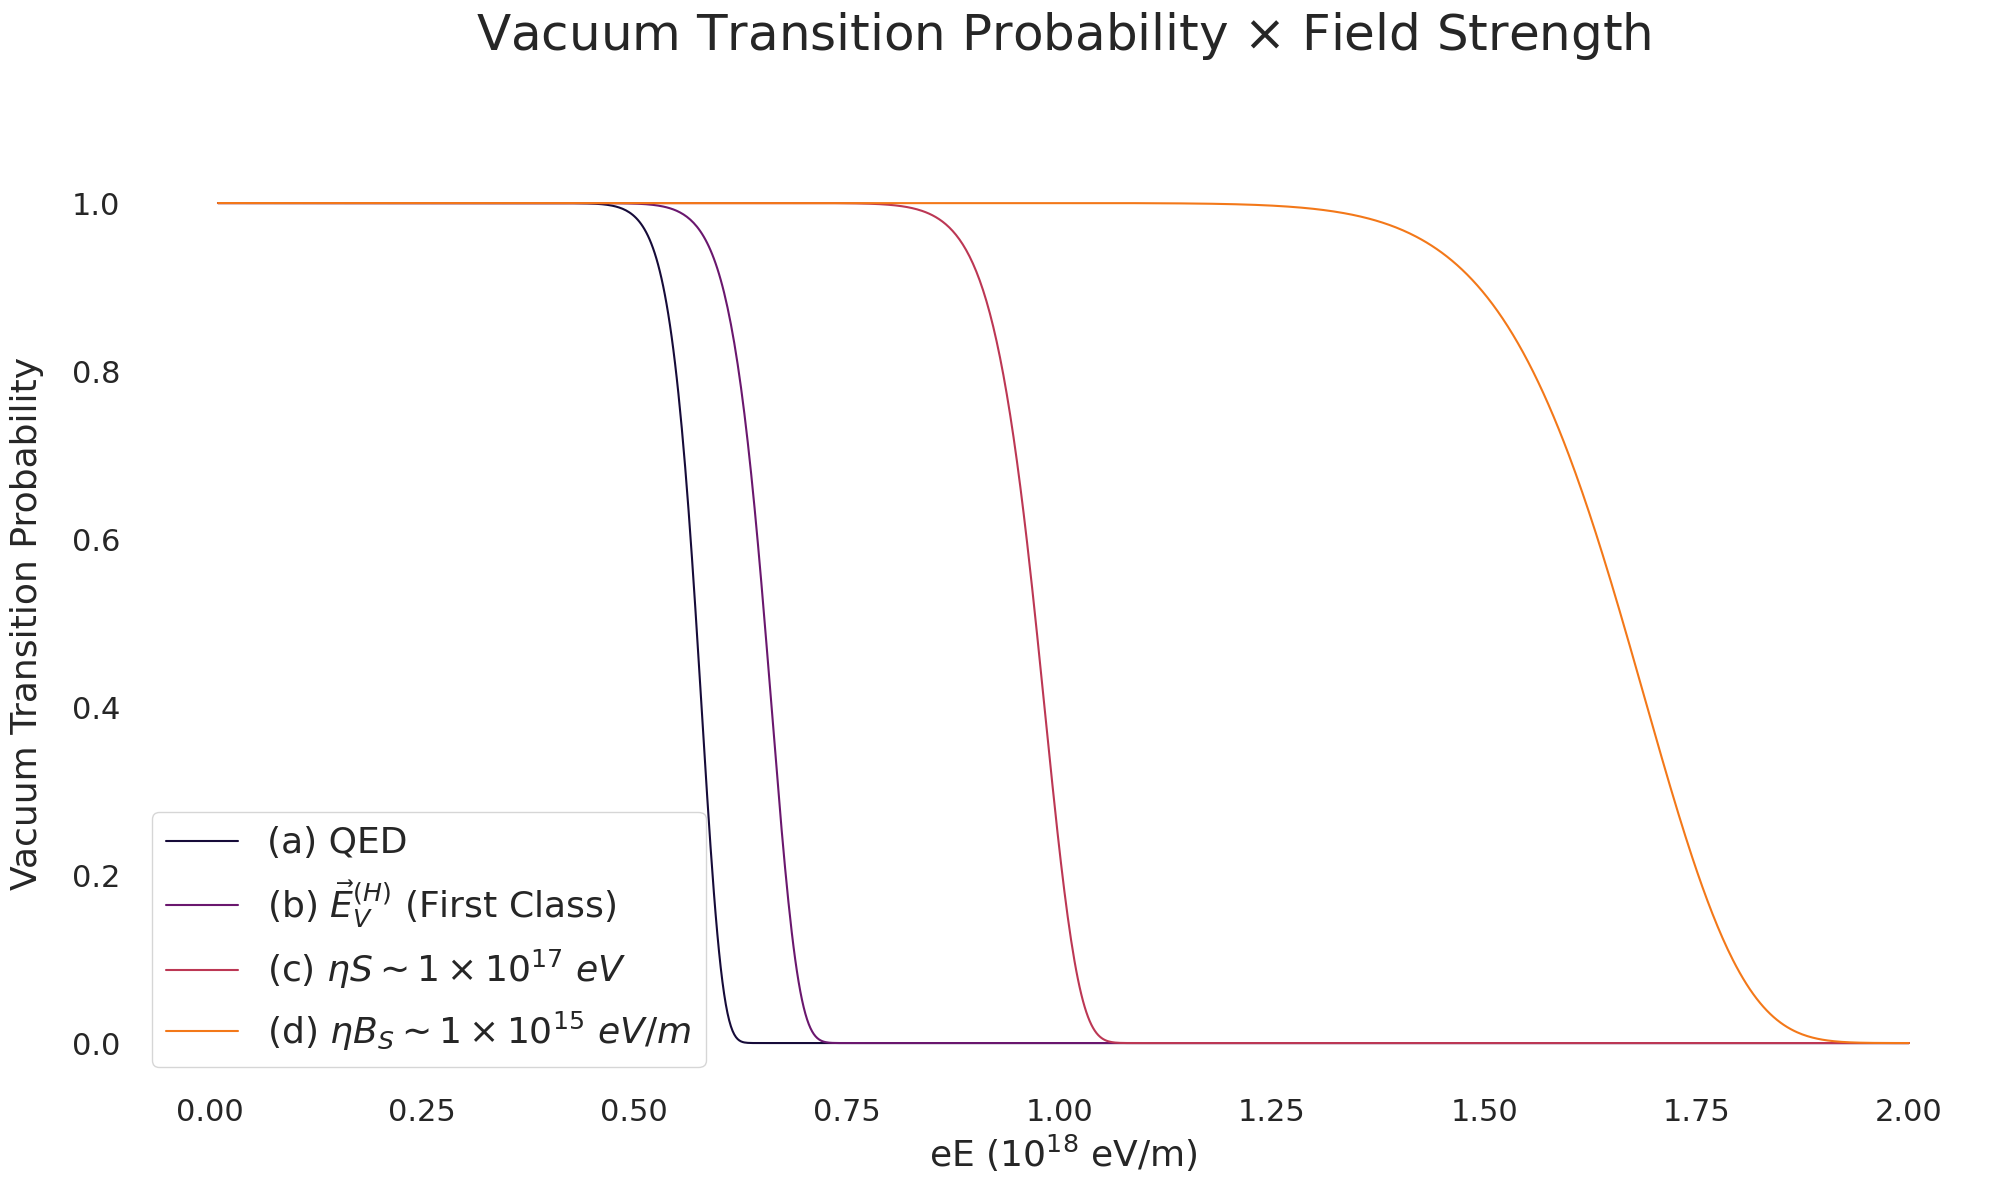

In [ ]:
# Autor: Lucas Pereira de Souza

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.special import spence # Importa a função dilogaritmo
import seaborn as sns
sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})#rc={'axes.facecolor':'ghostwhite', 'figure.facecolor':'ghostwhite'})

def zetaconst(m2,m2s2,eE,n):
  c = 2.99e8 # Velocidade da luz
  h = 6.58e-16 # Constante de Planck
  h2 = 4.33e-31 # Constante de Planck ao quadrado
  k = 1
  termo = 0
  if c*c*(1.0 - m2s2*137.0/(h2*eE*eE))<=0.0:
    return 0.0
  else:
    while k < n:
      termo = termo + (((-1.0)**k)/(k*k))*np.cos(k*np.pi*np.sqrt(1.0 - c*c*m2s2*137.0/(h2*eE*eE)))*np.exp(-np.sqrt(137.0)*np.pi*k*m2/(2.0*c*h*eE))
      k = k+1
  return termo

def zetadyn(nB,m2,m2s2,eE,n):
  c = 2.99e8 # Velocidade da luz
  h = 6.58e-16 # Constante de Planck
  h2 = 4.33e-31 # Constante de Planck ao quadrado
  k = 1
  termo = 0
  if 1.0 - 137.0*c*c*m2s2/(h2*eE*eE)<=0.0:
      termo = 0.0
      return termo
  else:
    while k < n:
      termo = termo + (((-1.0)**k)/(k))*(1/np.tanh(np.sqrt(137.0)*np.pi*k*nB/(2.0*c*h*eE)))*np.cos(np.sqrt(137.0/4.0)*c*k*np.pi*np.sqrt(1.0 - 137.0*(nB*nB + c*c*4.0*m2s2)/(8.0*h2*c*c*eE*eE)))*np.exp(-np.sqrt(137.0)*np.pi*k*m2/(2.0*c*h*eE))
      k = k+1
    return termo

def zetaOne(m2,eE,n):
  c = 2.99e8 # Velocidade da luz
  h = 6.58e-16 # Constante de Planck
  h2 = 4.33e-31 # Constante de Planck ao quadrado
  k = 1
  termo = (eE/(8.0*np.pi))*m2*np.log(1.0 - np.exp(-m2*np.pi/(c*h*eE)))
  while k < n:
    termo = termo - ((eE*eE)/(8.0*np.pi*np.pi))*(1/(k*k))*np.exp(-np.pi*k*m2/(c*h*eE))
    #if termo <= 0.0:
    #  return 0.0
    k = k+1
  return - termo

melec = 5.11e5 # massa do elétron
melec2 = 2.61e11 # massa do elétron ao quadrado
T = 1.0e-14 # Tempo do pulso de laser
l = 1.0e-10 # Comprimento de onda do laser
TV = T*(l**3) # volume do espaço tempo
pot = 1e18 # Ordem de grandeza do campo
pot2 = 1e36 # Ordem de grandeza ao quadrado
pi3 = np.pi**3 # Pi ao cubo
pi2 = np.pi**2 # Pi quadrado
c = 2.99e8 # Velocidade da luz
h = 6.58e-16 # Constante de Planck
h2 = 4.33e-31 # Constante de Planck ao quadrado
eE = np.linspace(0.01,2.0,1000) # produto da carga com o campo (vai de 0 a 1 multiplicando a potência)
eE2 = np.linspace(0.1,2.0,1000) # produto da carga com o campo (vai de 0 a 1 multiplicando a potência)
potc1 = 1e17
nB = 1e-14
nBdom = 1
m2s2 = 1e-24
bigm2S2 = 1e-20
prob = [] # Probabilidade para o Campo Elétrico
probSconst = [] # Probabilidade para vetor axial constante
probSdyn = [] # Probabilidade para vetor axial dinâmico
ProbbigS = [] # Probabilidade para vetor axial 'forte'
probOne = [] # Probabilidade para Hessiano da primeira classe
for k in range(len(eE)):
  j = eE[k]
  j2 = eE2[k]
  G = np.exp((-(TV*j*j*pot2)/(c*h2*pi2*137.0))*(spence(1.0-np.exp(-np.sqrt(np.pi)*melec2/(np.sqrt(4.0/137.0)*c*h*j*pot))))) # Taxa de produção de pares
  prob.append(G) # Anexa a probabilidade para um dado j
  GSconst = np.exp((-(TV*j*j*pot2)/(c*h2*pi2*137.0))*zetaconst(melec2,m2s2,j*pot,2)) # Taxa de produção de pares
  probSconst.append(GSconst) # Anexa a probabilidade para um dado j
  GSdyn = np.exp((-(TV*j*nB*pot2)/(c*h*np.pi*137.0))*zetadyn(nB,melec2,bigm2S2,j*pot,2))
  probSdyn.append(GSdyn)
  GOne = np.exp(((TV*j*pot)/(8.0*137*c*h2*pi2))*(melec2*np.log(1.0 - np.exp(-np.sqrt(np.pi)*melec2/(np.sqrt(4.0/137.0)*c*h*j*pot))) - (j*pot/np.pi)*spence(1.0-np.exp(-np.sqrt(np.pi)*melec2/(np.sqrt(4.0/137.0)*c*h*j*pot)))))#zetaOne(melec2,j*potc1,5)))
  probOne.append(GOne)
  #GSbig = np.exp((-(TV*j*nBdom*pot)/(c*h*np.pi*137.0))*zetabig(melec2,nBdom,j*pot,2))
  #ProbbigS.append(GSbig)

# Gera o gráfico
plt.figure(1, figsize=(24,12))
cmap = plt.get_cmap('inferno') # pick viridis, cividis, plasma or inferno
colors = [cmap(0.1), cmap(0.3), cmap(0.5), cmap(0.7)]
plt.plot(eE, prob, label={r'(a) QED'}, color=colors[0])#'orange')
plt.plot(eE, probOne, label=(r'(b) $\vec{E}_V^{(H)}$ (First Class)'), color=colors[1])#
plt.plot(eE, probSconst, label=(r'(c) $\eta S \sim 1\times10^{17} \ eV$'), color=colors[2])#'green')
plt.plot(eE, probSdyn, label=(r'(d) $\eta B_S \sim 1\times10^{15} \ eV/m$'), color=colors[3])#'blue')
#plt.plot(eE, ProbbigS, label=(r'$B_S = 10\times10^{18} eV/m$'))
plt.legend(loc='lower left', fontsize=26)
plt.title(r'Vacuum Transition Probability $\times$ Field Strength', fontsize=36, pad=80)
plt.xlabel(r'eE ($10^{18}$ eV/m)', fontsize=26)
plt.ylabel(r'Vacuum Transition Probability', fontsize=26, labelpad=20)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.show()